<a href="https://colab.research.google.com/github/Greenman44/Satellite-Image-Classification/blob/main/ML_AIsee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd


/root


In [ ]:
!pip install awscli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 112.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 24.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyYAML: filename=PyYAML-5.4.1-cp310-cp310-linux_x86_64.whl size=45658 sha256=448bdf0ed832d514f9bb3e3079367081fa046d3089b328e0dc778068a2b240d9
  Stored in directory: /root/.cache/pip/wheels/c7/0d/22/696ee92245ad710f506eee79bb05c740d8abccd3ecdb778683
Successfully built PyYAML
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting un

In [ ]:
!pip install tensorflow

In [ ]:
!pip install aisee

In [ ]:
!aws s3 cp s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/airport/ . --recursive --no-sign-request

Se han truncado las últimas 5000 líneas del flujo de salida.
download: s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/airport/airport_139/airport_139_1_msrgb.jpg to airport_139/airport_139_1_msrgb.jpg
download: s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/airport/airport_14/airport_14_0_msrgb.json to airport_14/airport_14_0_msrgb.json
download: s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/airport/airport_139/airport_139_1_rgb.json to airport_139/airport_139_1_rgb.json
download: s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/airport/airport_14/airport_14_0_msrgb.jpg to airport_14/airport_14_0_msrgb.jpg
download: s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/airport/airport_14/airport_14_0_rgb.json to airport_14/airport_14_0_rgb.json
download: s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/airport/airport_14/airport_14_1_msrgb.json to airport_14/airport_14_1_msrgb.json
download: s3://spacenet-dataset/Hosted-Datasets/f

In [ ]:
!aws s3 cp s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/zoo/ . --recursive --no-sign-request

Se han truncado las últimas 5000 líneas del flujo de salida.
download: s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/zoo/zoo_150/zoo_150_0_rgb.jpg to zoo_150/zoo_150_0_rgb.jpg
download: s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/zoo/zoo_149/zoo_149_3_rgb.jpg to zoo_149/zoo_149_3_rgb.jpg
download: s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/zoo/zoo_150/zoo_150_0_msrgb.jpg to zoo_150/zoo_150_0_msrgb.jpg
download: s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/zoo/zoo_150/zoo_150_2_msrgb.jpg to zoo_150/zoo_150_2_msrgb.jpg
download: s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/zoo/zoo_150/zoo_150_0_rgb.json to zoo_150/zoo_150_0_rgb.json
download: s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/zoo/zoo_150/zoo_150_2_msrgb.json to zoo_150/zoo_150_2_msrgb.json
download: s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/zoo/zoo_150/zoo_150_2_rgb.jpg to zoo_150/zoo_150_2_rgb.jpg
download: s3://spacenet-dataset/Ho

In [ ]:
import os
os.listdir(os.getcwd())


In [ ]:
airports = []
zoos = []
for folder in os.listdir(os.getcwd()):
    if folder[0:7] == "airport":
      airports.append(folder)
    elif folder[0:3] == "zoo":
      zoos.append(folder)

In [ ]:
cpath = os.getcwd()


In [ ]:

os.makedirs(os.path.join(cpath,"drive","MyDrive/","Train","airports"),exist_ok = True)
os.makedirs(os.path.join(cpath,"drive","MyDrive/""Train","zoos"),exist_ok = True)
os.makedirs(os.path.join(cpath,"drive","MyDrive/""Test","airports"),exist_ok = True)
os.makedirs(os.path.join(cpath,"drive","MyDrive/""Test","zoos"),exist_ok = True)

In [ ]:
airportspath = []
airphoto = []
zoospath = []
zoosphoto = []
for airfolder in airports:
  tpath = os.path.join(cpath,airfolder)
  for file in os.listdir(tpath):
    if file[len(file) - 4:] == ".jpg":
      airportspath.append(tpath)
      airphoto.append(file)
for zoofolder in zoos:
  tpath = os.path.join(cpath,zoofolder)
  for file in os.listdir(tpath):
    if file[len(file) - 4:] == ".jpg":
      zoospath.append(tpath)
      zoosphoto.append(file)



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
airminwidth = 1000000
airminheight = 1000000
zoominwidth = 1000000
zoominheight = 1000000
for i in range(1000):
  temp_pict = cv2.imread(os.path.join(cpath,airportspath[i],airphoto[i]))
  dim = temp_pict.shape
  if dim[0] < airminwidth: airminwidth = dim[0]
  if dim[1] < airminheight: airminheight = dim[1]



for i in range(1000):
  temp_pict = cv2.imread(os.path.join(cpath,zoospath[i],zoosphoto[i]))
  dim = temp_pict.shape
  if dim[0] < zoominwidth: zoominwidth = dim[0]
  if dim[1] < zoominheight: zoominheight = dim[1]


print(airminwidth,airminheight)
print(zoominwidth,zoominheight)

1087 1376
77 94


In [ ]:
import cv2
os.chdir(os.path.join(cpath,"drive","MyDrive","Train","zoos"))
for i in range(1000):
  temp_pict = cv2.imread(os.path.join(cpath,zoospath[i],zoosphoto[i]))
  resized_pict = cv2.resize(temp_pict,(256,256),interpolation = cv2.INTER_AREA)
  cv2.imwritemulti(zoosphoto[i],[resized_pict])



In [ ]:
import cv2
os.chdir(os.path.join(cpath,"drive","MyDrive","Test3","zoos"))
for i in range(100):
  temp_pict = cv2.imread(os.path.join(cpath,zoospath[1700+i],zoosphoto[1700 + i]))
  resized_pict = cv2.resize(temp_pict,(256,256),interpolation = cv2.INTER_AREA)
  cv2.imwritemulti(zoosphoto[1700 + i],[resized_pict])

In [ ]:
os.chdir(os.path.join(cpath,"drive","MyDrive","Test3","airports"))
for i in range(100):
  temp_pict = cv2.imread(os.path.join(cpath,airportspath[1700 + i],airphoto[1700+ i]))
  resized_pict = cv2.resize(temp_pict,(256,256),interpolation = cv2.INTER_AREA)
  cv2.imwritemulti(airphoto[1700 + i],[resized_pict])

In [ ]:
os.chdir(os.path.join(cpath,"drive","MyDrive","Train","airports"))
for i in range(1000):
  temp_pict = cv2.imread(os.path.join(cpath,airportspath[i],airphoto[i]))
  resized_pict = cv2.resize(temp_pict,(256,256),interpolation = cv2.INTER_AREA)
  cv2.imwritemulti(airphoto[i],[resized_pict])

In [ ]:
import os
os.chdir("/content")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Train_gen = ImageDataGenerator()
Train_Data = Train_gen.flow_from_directory("drive/MyDrive/Train")
Test_gen = ImageDataGenerator()
Test_Data = Test_gen.flow_from_directory("drive/MyDrive/Test")
Test_gen1 = ImageDataGenerator()
Test_Data1 = Test_gen1.flow_from_directory("drive/MyDrive/Test1")
Test_gen2 = ImageDataGenerator()
Test_Data2 = Test_gen2.flow_from_directory("drive/MyDrive/Test2")
Test_gen3 = ImageDataGenerator()
Test_Data3 = Test_gen3.flow_from_directory("drive/MyDrive/Test3")
SomePhotos = next(Test_Data)

Found 2000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import applications
inception = applications.InceptionV3(include_top=False, input_shape = (256,256,3))

In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall
predictor = Sequential([
    Flatten(),
    Dense(256, activation="relu"),
    Dense(2, activation="softmax")
])
modelo = Sequential([inception, predictor])
modelo.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["categorical_accuracy",
                       Precision(),
                       Recall()])

In [ ]:
history = modelo.fit(Train_Data,epochs=4,validation_data = Test_Data1)


Epoch 1/4
63/63 [==============================] - 67s 374ms/step - loss: 2.0665 - categorical_accuracy: 0.8570 - precision_2: 0.8570 - recall_2: 0.8570 - val_loss: 94.7140 - val_categorical_accuracy: 0.3450 - val_precision_2: 0.3450 - val_recall_2: 0.3450
Epoch 2/4
63/63 [==============================] - 23s 361ms/step - loss: 0.1130 - categorical_accuracy: 0.9625 - precision_2: 0.9625 - recall_2: 0.9625 - val_loss: 0.2760 - val_categorical_accuracy: 0.9500 - val_precision_2: 0.9500 - val_recall_2: 0.9500
Epoch 3/4
63/63 [==============================] - 21s 335ms/step - loss: 0.0901 - categorical_accuracy: 0.9780 - precision_2: 0.9780 - recall_2: 0.9780 - val_loss: 0.2608 - val_categorical_accuracy: 0.9250 - val_precision_2: 0.9250 - val_recall_2: 0.9250
Epoch 4/4
63/63 [==============================] - 22s 347ms/step - loss: 0.0510 - categorical_accuracy: 0.9890 - precision_2: 0.9890 - recall_2: 0.9890 - val_loss: 0.3521 - val_categorical_accuracy: 0.9100 - val_precision_2: 0.910

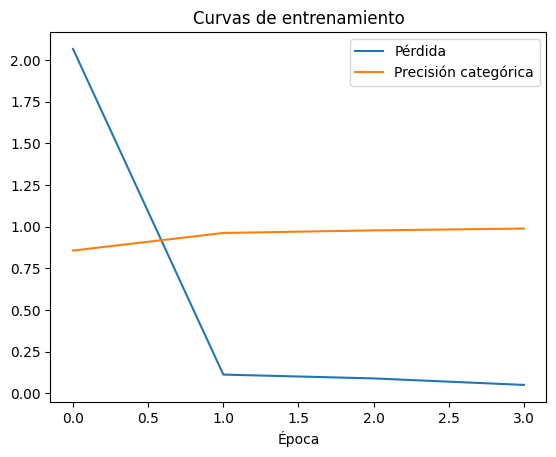

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history["categorical_accuracy"])


plt.title('Curvas de entrenamiento')

plt.xlabel('Época')
plt.legend(["Pérdida","Precisión categórica","Pérdida en validación"], loc='upper right')
plt.show()

In [ ]:
print(history.history)

{'loss': [2.0664682388305664, 0.11297183483839035, 0.09006474912166595, 0.050984010100364685], 'categorical_accuracy': [0.8569999933242798, 0.9624999761581421, 0.9779999852180481, 0.9890000224113464], 'precision_2': [0.8569999933242798, 0.9624999761581421, 0.9779999852180481, 0.9890000224113464], 'recall_2': [0.8569999933242798, 0.9624999761581421, 0.9779999852180481, 0.9890000224113464], 'val_loss': [94.71397399902344, 0.2759609818458557, 0.2608228623867035, 0.3521099090576172], 'val_categorical_accuracy': [0.3449999988079071, 0.949999988079071, 0.925000011920929, 0.9100000262260437], 'val_precision_2': [0.3449999988079071, 0.949999988079071, 0.925000011920929, 0.9100000262260437], 'val_recall_2': [0.3449999988079071, 0.949999988079071, 0.925000011920929, 0.9100000262260437]}


In [ ]:
metrics = modelo.predict(Test_Data1)

7/7 [==============================] - 2s 130ms/step


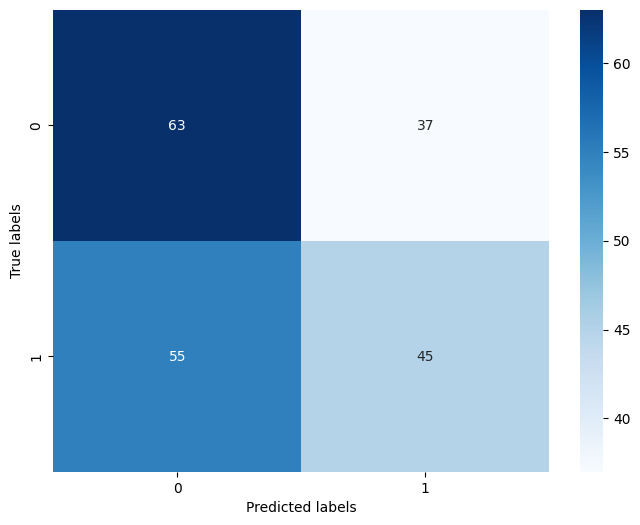

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
y_pred_classes = np.argmax(metrics, -1)
y_true_classes = Test_Data1.classes
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
m = modelo.evaluate(Test_Data)

19/19 [==============================] - 127s 7s/step - loss: 1.8555 - categorical_accuracy: 0.8217 - precision_3: 0.8217 - recall_3: 0.8217


In [ ]:
m1 = modelo.evaluate(Test_Data1)

7/7 [==============================] - 1s 122ms/step - loss: 0.3589 - categorical_accuracy: 0.8950 - precision_6: 0.8950 - recall_6: 0.8950


In [ ]:
m2 = modelo.evaluate(Test_Data2)

7/7 [==============================] - 1s 121ms/step - loss: 0.4311 - categorical_accuracy: 0.8850 - precision_6: 0.8850 - recall_6: 0.8850


In [ ]:
m3 = modelo.evaluate(Test_Data3)

7/7 [==============================] - 1s 123ms/step - loss: 0.6695 - categorical_accuracy: 0.8500 - precision_6: 0.8500 - recall_6: 0.8500


In [ ]:
def mean(l):
  acum = 0
  for i in l:
    acum += i
  return acum/ len(l)

def var(l):
  m = mean(l)
  acum = 0
  for i in l:
    acum += (i - m)**2
  return acum/(len(l)-1)
mCP = mean([m[1],m1[1],m2[1],m3[1]])

mP = mean([m[0],m1[0],m2[0],m3[0]])

vCP = var([m[1],m1[1],m2[1],m3[1]])

vP = var([m[0],m1[0],m2[0],m3[0]])

print(mCP,mP,vCP,vP)

0.8754166662693024 0.5449016466736794 0.00037847150034409083 0.03126108639016878


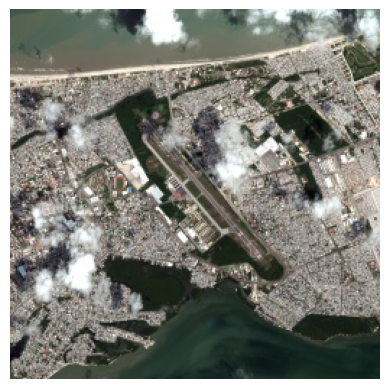

Predicción: aeropuerto


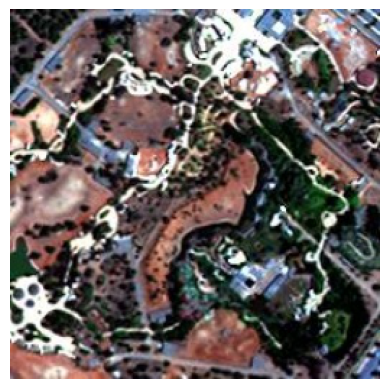

Predicción: zoológico


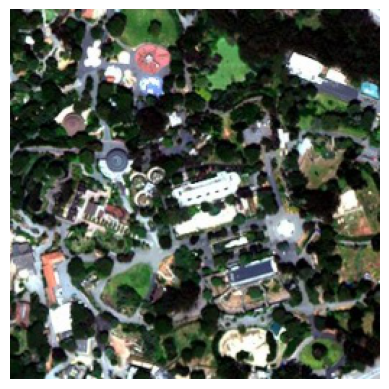

Predicción: zoológico


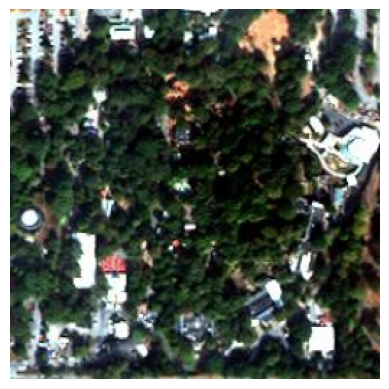

Predicción: zoológico


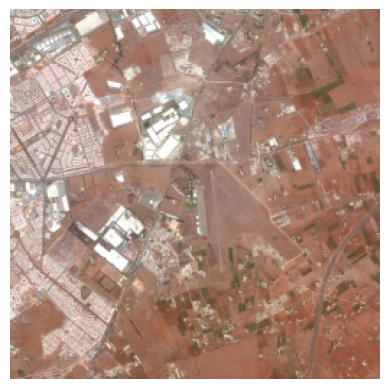

Predicción: aeropuerto


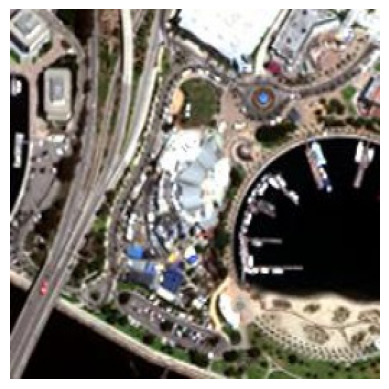

Predicción: zoológico


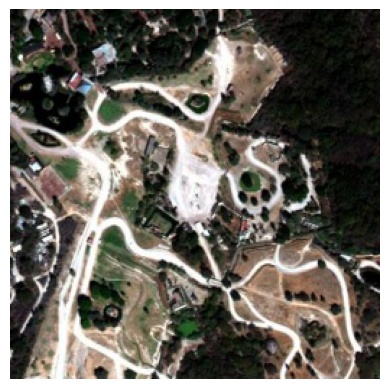

Predicción: zoológico


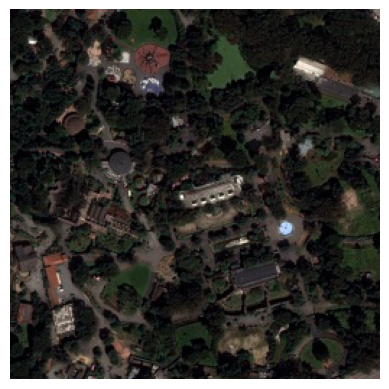

Predicción: zoológico


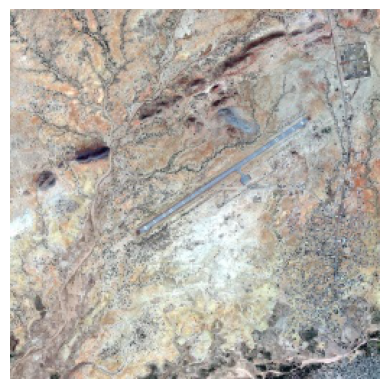

Predicción: aeropuerto


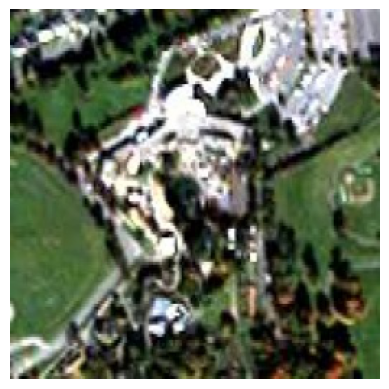

Predicción: zoológico


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
clase = np.argmax(results, -1)
mostrar_imagenes = 10
for i in range(mostrar_imagenes):
    plt.imshow(SomePhotos[0][i]/255.)
    plt.axis('off')
    plt.show()
    print("Predicción:", "zoológico" if clase[i] else "aeropuerto")


In [ ]:
modelo.summary()

In [ ]:
os.chdir(os.path.join(cpath,"drive/MyDrive/ModelsWeights"))
modelo.save("AirZooClassifier.h5")
modelo.save_weights("AirZooWClassifier.h5")

In [ ]:
def Assign(mainpath,photos,subset,cathegory):
  for i in range(len(mainpath)):
    oldpath = os.path.join(mainpath[i],photos[i])
    newpath = os.path.join(os.getcwd(),subset,cathegory,photos[i])
    if(os.path.isfile(oldpath)):
      os.rename(oldpath,newpath)
Assign(airportspath[:int((70 * len(airportspath))/100)],airphoto[:int((70 * len(airphoto))/100)],"Train","airports")
Assign(airportspath[int((70 * len(airportspath))/100):],airphoto[int((70 * len(airphoto))/100):],"Test","airports")
Assign(zoospath[:int((70 * len(zoospath))/100)],zoosphoto[:int((70 * len(zoosphoto))/100)],"Train","zoos")
Assign(zoospath[int((70 * len(zoospath))/100):],zoosphoto[int((70 * len(zoosphoto))/100):],"Test","zoos")

In [ ]:
import cv2
os.makedirs(os.path.join(cpath,"train","airports"),exist_ok = True)
os.makedirs(os.path.join(cpath,"train","zoos"),exist_ok = True)
os.makedirs(os.path.join(cpath,"test","airports"),exist_ok = True)
os.makedirs(os.path.join(cpath,"test","zoos"),exist_ok = True)

In [ ]:
import PIL.Image
PIL.Image.MAX_IMAGE_PIXELS = None


In [ ]:
print(results)

In [ ]:
print(modelo.metrics[1])

MeanMetricWrapper(name=accuracy,dtype=float32,fn=<function binary_accuracy at 0x7f7b304169e0>)


In [ ]:
os.makedirs(os.path.join(cpath,"Total_airports","airports"),exist_ok = True)

In [ ]:
os.chdir(cpath)
Wrong_Data = Test_gen.flow_from_directory("Total_airports")

Found 100 images belonging to 1 classes.


In [ ]:
for i in os.listdir(os.path.join(cpath,"Total_airports","airports")):
   oldpath = os.path.join(cpath,"Total_airports","airports",i)
   newpath = os.path.join(cpath,"TrainZoos","Airports",i)
   os.rename(oldpath,newpath)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
os.chdir(cpath)
Train_gen = ImageDataGenerator()
Train_Data = Train_gen.flow_from_directory("Training")

In [ ]:
for i in os.listdir(os.path.join(cpath,"Total_airports","airports")):
   oldpath = os.path.join(cpath,"Total_airports","airports",i)
   newpath = os.path.join(cpath,"TestZoos","Airports",i)
   os.rename(oldpath,newpath)